In [65]:
import pandas as pd
import plotly.express as px
import os
from plotly.offline import plot, iplot, init_notebook_mode
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [67]:
df= pd.read_csv('../DataBases/thyroid/all_conditions.csv')

In [68]:
print(df.describe())


              age          TSH           T3          TT4          T4U  \
count  2799.00000  2516.000000  2215.000000  2616.000000  2503.000000   
mean     51.84423     4.672150     2.024966   109.072401     0.997912   
std      20.46116    21.449453     0.824600    35.392443     0.194390   
min       1.00000     0.005000     0.050000     2.000000     0.310000   
25%      36.00000     0.440000     1.600000    88.000000     0.880000   
50%      54.00000     1.400000     2.000000   104.000000     0.980000   
75%      67.00000     2.600000     2.400000   125.000000     1.080000   
max     455.00000   478.000000    10.600000   430.000000     2.120000   

               FTI  TBG   patient_id  
count  2505.000000  0.0  2800.000000  
mean    110.787984  NaN  1895.603214  
std      32.883986  NaN  1091.130220  
min       2.000000  NaN     1.000000  
25%      93.000000  NaN   955.750000  
50%     107.000000  NaN  1913.000000  
75%     124.000000  NaN  2837.500000  
max     395.000000  NaN  3772.

In [69]:
# In this example, we will only look TSH values are related (Correlation function says they are )
print(df.corr(method='pearson'))

                 age       TSH        T3       TT4       T4U       FTI  TBG  \
age         1.000000 -0.059776 -0.244702 -0.052111 -0.163357  0.037623  NaN   
TSH        -0.059776  1.000000 -0.160890 -0.254791  0.067705 -0.291188  NaN   
T3         -0.244702 -0.160890  1.000000  0.563901  0.463434  0.351013  NaN   
TT4        -0.052111 -0.254791  0.563901  1.000000  0.434248  0.795206  NaN   
T4U        -0.163357  0.067705  0.463434  0.434248  1.000000 -0.173056  NaN   
FTI         0.037623 -0.291188  0.351013  0.795206 -0.173056  1.000000  NaN   
TBG              NaN       NaN       NaN       NaN       NaN       NaN  NaN   
patient_id -0.044519  0.059232 -0.014278  0.033770 -0.025212  0.058891  NaN   

            patient_id  
age          -0.044519  
TSH           0.059232  
T3           -0.014278  
TT4           0.033770  
T4U          -0.025212  
FTI           0.058891  
TBG                NaN  
patient_id    1.000000  


In [70]:
df = df[['age','sex','TSH_measured','TSH']]

In [71]:
#  filtering TSH_Measured values which are True (t)

df = df[df['TSH_measured']=='t']
# limiting age values lower than 100
df = df[df['age'] < 100]

Text(0.5, 0.98, 'Thyroid-stimulating hormone measured in Females and Males with Different Ages')

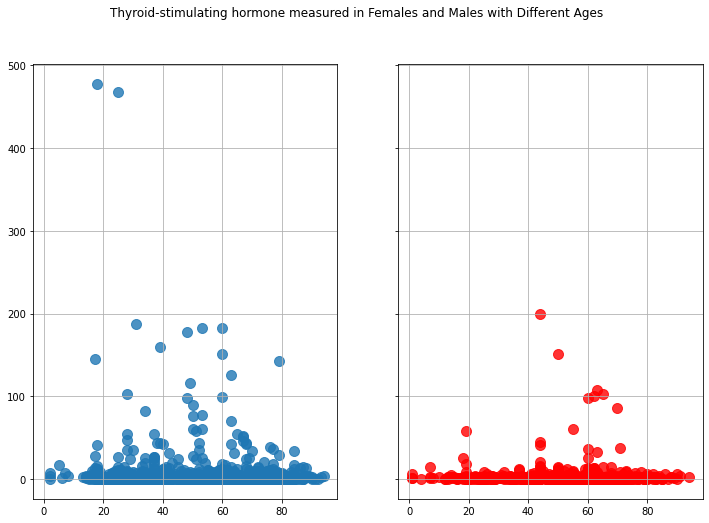

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12, 8))
[x.grid(True) for x in (ax1,ax2)]
ax1.scatter(df_female['age'],df_female['TSH'],s=100,alpha=0.8)
ax2.scatter(df_male['age'],df_male['TSH'],color='red',s=100,alpha=0.8)
fig.suptitle('Thyroid-stimulating hormone measured in Females and Males with Different Ages')


In [81]:
# Females are more prone to thyroid disease from males. There are TSH measured between the 80-200 are
# relatively high comparing to males

#To see how standart deviation effects these two graphics we can add some std function thanks to pandas.

# mean and std values for females
df_female = df[df['sex']=='F']

df_female['tsh_mean_females'] = df_female['TSH'].mean()
df_female['tsh_std_females'] = df_female['TSH'].std()
df_female['upper_limit_std_females'] = df_female['tsh_mean_females']+df_female['tsh_std_females']

df_female

,age,sex,TSH_measured,TSH,tsh_mean_females,tsh_std_females,upper_limit_std_females
0,41.0,F,t,1.30,5.032274,22.251463,27.283738
1,23.0,F,t,4.10,5.032274,22.251463,27.283738
3,70.0,F,t,0.16,5.032274,22.251463,27.283738
4,70.0,F,t,0.72,5.032274,22.251463,27.283738
5,18.0,F,t,0.03,5.032274,22.251463,27.283738
...,...,...,...,...,...,...,...
2791,68.0,F,t,1.00,5.032274,22.251463,27.283738
2793,82.0,F,t,0.03,5.032274,22.251463,27.283738
2794,25.0,F,t,1.90,5.032274,22.251463,27.283738
2798,60.0,F,t,1.40,5.032274,22.251463,27.283738


In [82]:
# mean and std values for males
df_male = df[df['sex']=='M']
df_male['tsh_mean_males'] = df_male['TSH'].mean()
df_male['tsh_std_males'] = df_male['TSH'].std()
df_male['upper_limit_std_males'] = df_male['tsh_mean_males']+df_male['tsh_std_males']
df_male

,age,sex,TSH_measured,TSH,tsh_mean_males,tsh_std_males,upper_limit_std_males
2,46.0,M,t,0.98,3.454036,12.664017,16.118053
9,68.0,M,t,2.40,3.454036,12.664017,16.118053
14,28.0,M,t,3.30,3.454036,12.664017,16.118053
19,28.0,M,t,2.10,3.454036,12.664017,16.118053
21,46.0,M,t,0.80,3.454036,12.664017,16.118053
...,...,...,...,...,...,...,...
2776,79.0,M,t,1.10,3.454036,12.664017,16.118053
2785,57.0,M,t,1.00,3.454036,12.664017,16.118053
2788,70.0,M,t,1.50,3.454036,12.664017,16.118053
2790,67.0,M,t,2.10,3.454036,12.664017,16.118053


Text(0.5, 0.98, 'Thyroid-stimulating hormone measured in Females and Males with Different Ages')

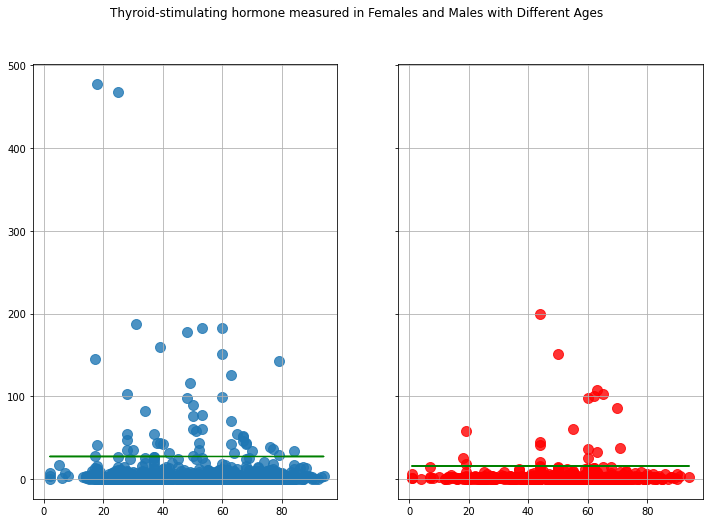

In [86]:
fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12, 8))
[x.grid(True) for x in (ax1,ax2)]
ax1.scatter(df_female['age'],df_female['TSH'],s=100,alpha=0.8)
ax1.plot(df_female['age'],df_female['upper_limit_std_females'],color='green')

ax2.scatter(df_male['age'],df_male['TSH'],color='red',s=100,alpha=0.8)
ax2.plot(df_male['age'],df_male['upper_limit_std_males'],color='green')

fig.suptitle('Thyroid-stimulating hormone measured in Females and Males with Different Ages')

In [ ]:
# The standart deviation of Tsh values in females is 27.28 and 16.11 in males.
# This doesn't mean it's safe for values 27 for the females of course, 
# but it will definitely give an idea about standart levels.